<a href="https://colab.research.google.com/github/Ravi-ranjan1801/ML-Lab/blob/main/lab_3_handwritten_digit_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Q2
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])
train_dataset = datasets.MNIST(root='./data/',
                               train=True,
                               download=True,
                               transform=transform)
test_dataset = datasets.MNIST(root='./data/',
                              train=False,
                              download=True,
                              transform=transform)
train_loader = DataLoader(dataset=train_dataset,
                           batch_size=64,
                           shuffle=True)
test_loader = DataLoader(dataset=test_dataset,
                         batch_size=1000,
                         shuffle=False)
print("Data Loaded Successfully!")

100%|██████████| 9.91M/9.91M [00:00<00:00, 18.7MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 493kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.65MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 9.85MB/s]

Data Loaded Successfully!


In [3]:
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = SimpleNet().to(device)
print(model)

SimpleNet(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
  (relu): ReLU()
)


In [4]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

print("Starting Training...")
for epoch in range(5):
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}")

print("Training Complete!")

Starting Training...
Epoch 1, Loss: 0.2750362187469088
Epoch 2, Loss: 0.11350035927355734
Epoch 3, Loss: 0.07847995244300188
Epoch 4, Loss: 0.05803607230328881
Epoch 5, Loss: 0.046344773759986004
Training Complete!


In [5]:
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10,000 test images: {100 * correct / total} %')

Accuracy of the network on the 10,000 test images: 97.61 %


Saving digit-06.png to digit-06.png


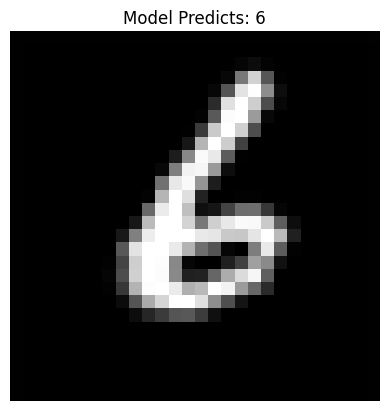

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from PIL import Image

uploaded = files.upload()
filename = next(iter(uploaded))

def predict_image(image_path, model, device):

    img = Image.open(image_path).convert('L')

    import PIL.ImageOps
    img = PIL.ImageOps.invert(img)


    img = img.resize((28, 28))


    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])

    img_tensor = transform(img).unsqueeze(0).to(device)

    model.eval()
    with torch.no_grad():
        output = model(img_tensor)

        prediction = torch.argmax(output, dim=1).item()

    plt.imshow(img, cmap='gray')
    plt.title(f"Model Predicts: {prediction}")
    plt.axis('off')
    plt.show()

# Run the function
predict_image(filename, model, device)